In [68]:
import pandas as pd
df = pd.read_csv("data/statistics.csv")
df = df[1:]
df


,query,question,answer,tag,tag_predict
1,Các phương thức xét tuyển của học viện?,Các phương thức xét tuyển của học viện?,Xét tuyển tài năng\n Xét tuyển dựa vào kết qu...,tuyển sinh,tuyển sinh
2,Hồ sơ nhập học cần chuẩn bị những gì?,Hồ sơ nhập học cần chuẩn bị những gì?,Hồ sơ nhập học cần chuẩn bị các thứ sau:\n1. B...,tuyển sinh,tuyển sinh
3,Những ngành học mới trong học viện năm 2024?,Những ngành học mới trong học viện năm 2024?,Bạn muốn hỏi ngành mới của học viện ở cơ sở mi...,ngành đào tạo,ngành đào tạo
4,những ngành học mới trong học viện năm 2024 mi...,Những ngành học mới trong học viện năm 2024 tạ...,Cơ sở miền bắc có đào tạo thêm các ngành mới s...,ngành đào tạo,ngành đào tạo
5,những ngành học mới trong học viện năm 2024 mi...,Ngành học mới trong học viện năm 2024 tại cơ s...,Cơ sở miền nam có đào tạo 2 ngành mới so với n...,ngành đào tạo,ngành đào tạo
...,...,...,...,...,...
322,"điểm chuẩn tất cả các ngành năm 2024 miền bắc,...",Điểm chuẩn tất cả các ngành theo xét tuyển kết...,Điểm chuẩn tất cả các ngành theo phương thức x...,điểm,điểm
323,"Quy định, quy chế tuyển sinh của học viện?","Quy định, quy chế tuyển sinh của học viện?",Quy chế 1: Xét tuyển theo ngành và theo tổ hợp...,tuyển sinh,tuyển sinh
324,"Quy định, quy chế tuyển sinh của học viện?","Quy định, quy chế tuyển sinh của học viện?",Quy chế 1: Xét tuyển theo ngành và theo tổ hợp...,tuyển sinh,tuyển sinh
325,Các trang web chính thức của học viện?,Các trang web chính thức của học viện?,Các trang web chính thức của học viện là:\n1. ...,học viện,học viện


In [69]:
accuracy_df = df.groupby('tag').apply(
    lambda group: pd.Series({
        'total': len(group),
        'correct': (group['tag'] == group['tag_predict']).sum()
    })
).reset_index()

accuracy_df['accuracy (%)'] = (accuracy_df['correct'] / accuracy_df['total']) * 100


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


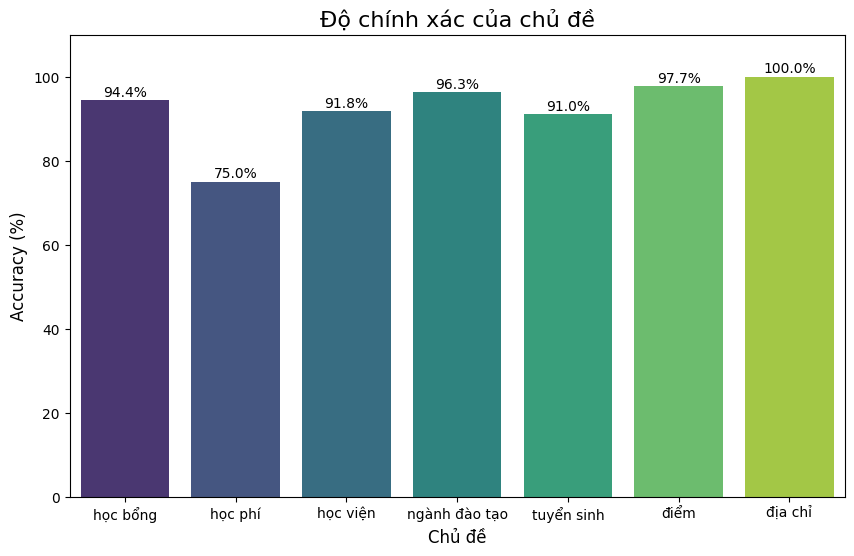

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x='tag', y='accuracy (%)', palette='viridis')

for index, row in accuracy_df.iterrows():
    plt.text(index, row['accuracy (%)'] + 1, f"{row['accuracy (%)']:.1f}%", ha='center', fontsize=10)

plt.title('Độ chính xác của chủ đề', fontsize=16)
plt.xlabel('Chủ đề', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 110)  
plt.show()


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


                                               query  count
0            Các phương thức xét tuyển của học viện?     15
1              Hồ sơ nhập học cần chuẩn bị những gì?     12
2         Quy định, quy chế tuyển sinh của học viện?     11
3               Điểm chuẩn tất cả các ngành năm nay?     10
4                   Trụ sở chính của học viện ở đâu?      9
5       Những ngành học mới trong học viện năm 2024?      9
6             Các trang web chính thức của học viện?      8
7  Các mốc thời gian quan trọng trong việc tuyển ...      7
8                      Các câu lạc bộ có ở học viện?      6
9               Học viện có bao nhiêu loại học bổng?      6


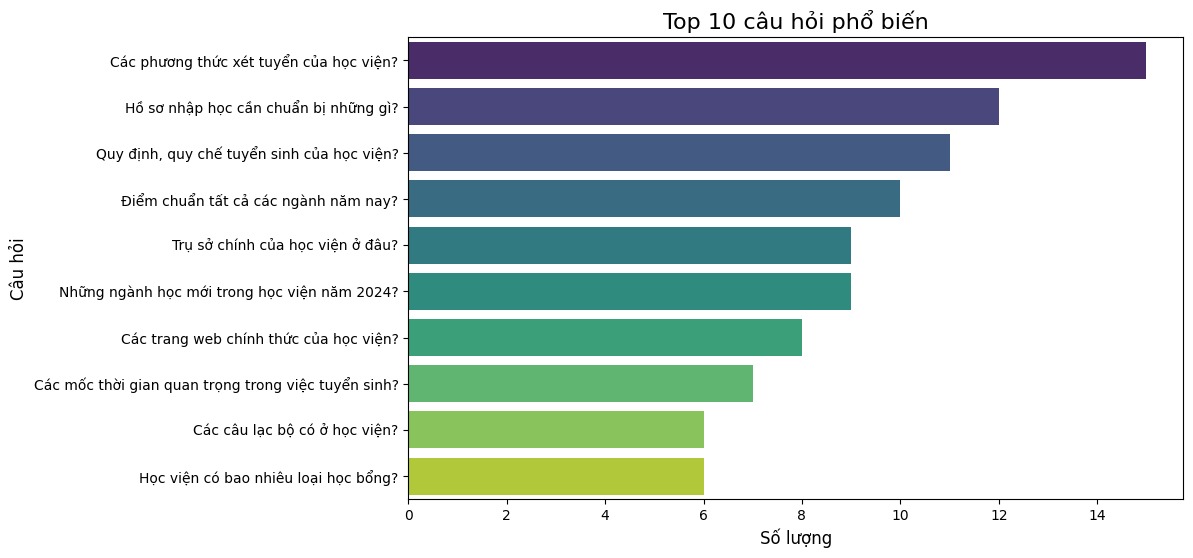

In [71]:
# Thống kê tần suất của các câu query
query_counts = df['query'].value_counts().head(10).reset_index()
query_counts.columns = ['query', 'count']
print(query_counts)
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(data=query_counts, y='query', x='count', palette='viridis')

# Cài đặt nhãn và tiêu đề
plt.title('Top 10 câu hỏi phổ biến', fontsize=16)
plt.xlabel('Số lượng', fontsize=12)
plt.ylabel('Câu hỏi', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


1                Các phương thức xét tuyển của học viện?
2                  Hồ sơ nhập học cần chuẩn bị những gì?
3           Những ngành học mới trong học viện năm 2024?
4      những ngành học mới trong học viện năm 2024 mi...
5      những ngành học mới trong học viện năm 2024 mi...
                             ...                        
322    điểm chuẩn tất cả các ngành năm 2024 miền bắc,...
323           Quy định, quy chế tuyển sinh của học viện?
324           Quy định, quy chế tuyển sinh của học viện?
325               Các trang web chính thức của học viện?
326         Những ngành học mới trong học viện năm 2024?
Name: query, Length: 326, dtype: object


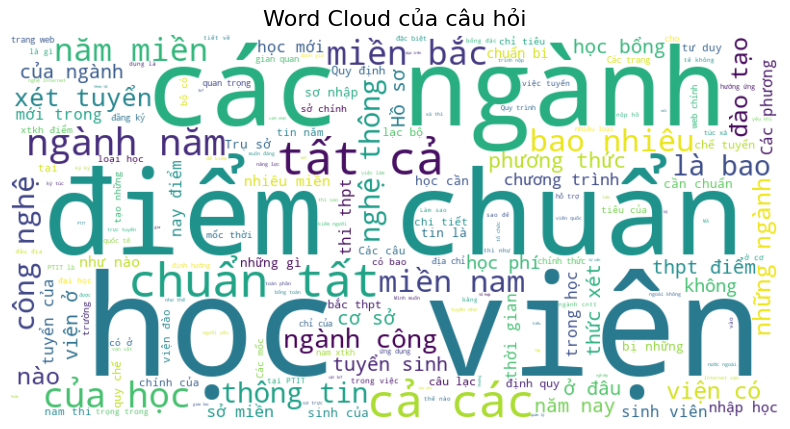

In [72]:
from wordcloud import WordCloud
print(df['query'])
# Tạo Word Cloud từ danh sách query
query_text = ' '.join(df['query'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(query_text)

# Hiển thị Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud của câu hỏi", fontsize=16)
plt.show()
